# Netflix Movie Data

This dataset contains more than 8,500 Netflix movies and TV shows, including cast members, duration, and genre. It contains titles added as recently as late September 2021.

### Importing Libraries

In [1]:
# Import  libraries under their usuals alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting matplotlib and warnings

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

 ### Loading friend's data into a dictionary

In [2]:
# Create the years and durations lists
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93,90]

# Create a dictionary with the two lists
movie_dict = {"years": years, "durations": durations}

# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

### Creating a DataFrame from a dictionary


In [3]:
# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


### A visual inspection of our data

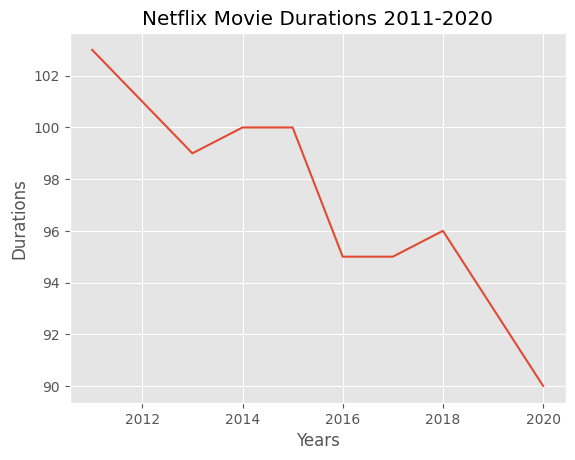

In [4]:
# create a figure
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'],durations_df['durations'])

# Create a title
plt.title( "Netflix Movie Durations 2011-2020")
plt.xlabel("Years")
plt.ylabel("Durations")

# Show the plot
plt.show()

### Loading the rest of the data from a CSV

In [5]:
# Read in the CSV as a DataFrame
df = pd.read_csv("netflix_dataset.csv")

# Print the first five rows of the DataFrame
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Exploratory Analysis to know variables and check for values NA

In [6]:
#types of variables

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#checking for values NA

def missing_values(df):
    #Let's create a dataframe, round the results, and name the columns
    df_missing_count = df.isnull().sum().reset_index().rename(columns={'index':'column_name', 0:'missing_count'})
    #Create a dataframe calculating percentage
    missing_percnt = df.isnull().sum() * 100 / df.shape[0] #df.shape[0] will give us the number of lines
    #Let's create a dataframe, round the results, and name the columns
    df_missing_percnt = pd.DataFrame(missing_percnt).round(2).reset_index().rename(columns={
                        'index':'column_name', 0:'missing_values(%)'})
   
    df = df_missing_count.merge(df_missing_percnt, how = 'inner', left_on = 'column_name', right_on = 'column_name')
    df = df.sort_values(by = 'missing_values(%)',ascending = False)
    return df

In [8]:
missing_values(df)

,column_name,missing_count,missing_values(%)
3,director,2634,29.91
5,country,831,9.44
4,cast,825,9.37
6,date_added,10,0.11
8,rating,4,0.05
9,duration,3,0.03
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
7,release_year,0,0.00


### Data Cleaning and Transform from string to float column 'duraction'

In [9]:
# drop string 'min' of the column duration and convert on float
df['duration'] = pd.to_numeric(df['duration'].str.replace('min',''),errors='coerce')
df['duration'].head(5)


0    90.0
1     NaN
2     NaN
3     NaN
4     NaN
Name: duration, dtype: float64

In [10]:
df_clean = df.copy()

#director NA 2,634
df_clean['director'] = df_clean['director'].fillna("Not director" )
#country NA 831
df_clean['country'] = df_clean['country'].fillna('Not country')
#cast NA 825
df_clean['cast'] = df_clean['cast'].fillna('Not cast')
#date_added NA 10
df_clean['date_added'] = df_clean['date_added'].fillna(method='ffill')
#rating NA 4
df_clean['rating'] = df_clean['rating'].fillna(method='ffill')
#duration NA 3
df_clean['duration'] = df_clean['duration'].fillna(df['duration'].mean())

c_netflix_df = df_clean.copy()
c_netflix_df.isna().sum().to_frame("NA")

,NA
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [11]:
# Describe Qualitative variables (type object)

c_netflix_df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,8807,4529,Not director,2634
cast,8807,7693,Not cast,825
country,8807,749,United States,2818
date_added,8807,1767,"January 1, 2020",109
rating,8807,17,TV-MA,3208
listed_in,8807,514,"Dramas, International Movies",362
description,8807,8775,"Paranormal activity at a lush, abandoned prope...",4


<AxesSubplot: xlabel='type', ylabel='Count'>

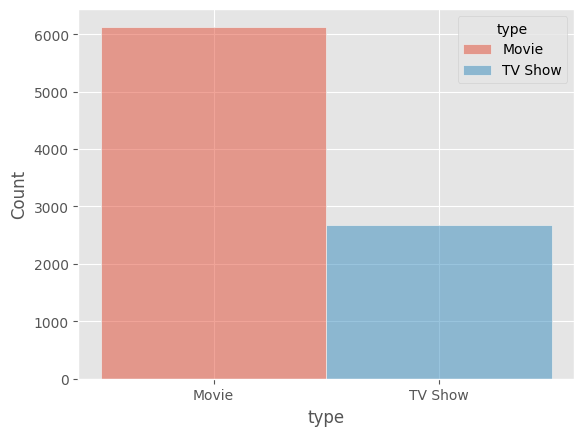

In [12]:
#Varible's Frequency 'type'
sns.histplot(x= 'type' ,hue ='type', stat = 'count',  data = c_netflix_df)

In [13]:
# Describe Quantitative variables (type int64)

round(c_netflix_df.select_dtypes(include=['int64','float']).describe(),1)

,release_year,duration
count,8807.0,8807.0
mean,2014.2,99.6
std,8.8,23.6
min,1925.0,3.0
25%,2013.0,92.0
50%,2017.0,99.6
75%,2019.0,106.0
max,2021.0,312.0


<AxesSubplot: xlabel='release_year', ylabel='duration'>

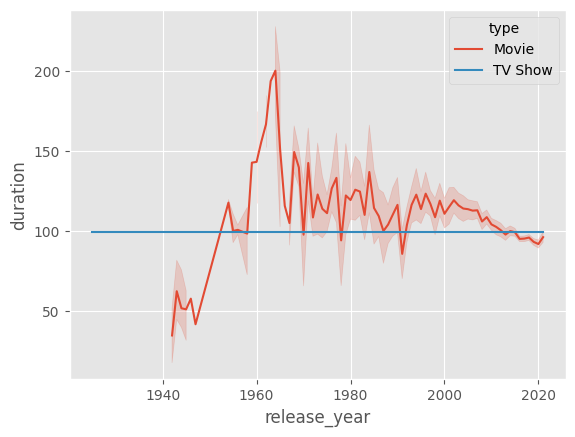

In [14]:
# Time series over the years by type 
sns.lineplot(x= 'release_year' , y = 'duration',hue = 'type' , data = c_netflix_df)

### Filtering for movies!

In [15]:

# Subset the DataFrame for type "Movie"
netflix_df_movies_only = c_netflix_df[(c_netflix_df['type'] == 'Movie')]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only.iloc[:,[2,5,10,7,9]]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head(5)

,title,country,listed_in,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020,90.0
6,My Little Pony: A New Generation,Not country,Children & Family Movies,2021,91.0
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies",1993,125.0
9,The Starling,United States,"Comedies, Dramas",2021,104.0
12,Je Suis Karl,"Germany, Czech Republic","Dramas, International Movies",2021,127.0


### Creating a scatter plot

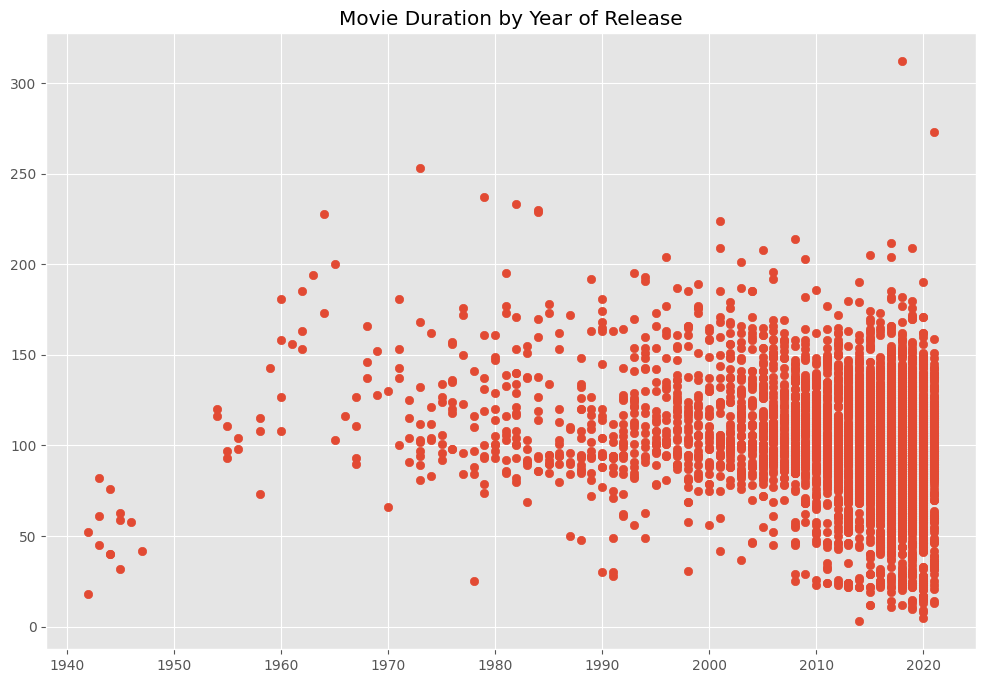

In [16]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(x = netflix_movies_col_subset['release_year'], y = netflix_movies_col_subset['duration'])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

### Digging deeper

In [17]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 20 rows of short_movies
short_movies.head(10).sort_values('duration', ascending= False)

,title,country,listed_in,release_year,duration
279,Monster Hunter: Legends of the Guild,"United States, Japan","Action & Adventure, Anime Features, Children &...",2021,59.0
77,Little Singham - Black Shadow,Not country,"Children & Family Movies, Comedies",2021,48.0
484,Lee Su-geun: The Sense Coach,Not country,Stand-Up Comedy,2021,46.0
470,Bridgerton - The Afterparty,Not country,Movies,2021,39.0
560,Audible,Not country,"Documentaries, Sports Movies",2021,39.0
495,Awon Boyz,Not country,"Documentaries, International Movies",2019,38.0
45,My Heroes Were Cowboys,Not country,Documentaries,2021,23.0
71,A StoryBots Space Adventure,Not country,Children & Family Movies,2021,13.0
694,Aziza,"Lebanon, Syria","Comedies, Dramas, Independent Movies",2019,13.0
695,Besieged Bread,Not country,"Dramas, International Movies",2015,12.0


### Marking non-feature films

In [18]:
# top 10 by Genere
netflix_movies_col_subset['listed_in'].value_counts().sort_values(ascending= False).nlargest(10).to_frame("TOP10")

,TOP10
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186
"Dramas, International Movies, Romantic Movies",180
"Comedies, International Movies",176


In [19]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for index , row in netflix_movies_col_subset.iterrows() :
    if row['listed_in'] == "Children & Family Movies":
        colors.append("red")
    elif row['listed_in'] == "Documentaries":
        colors.append("blue")
    elif  row['listed_in'] == "Stand-Up Comedy":
        colors.append("green")
    else:
         colors.append("black")
        
# Inspect the first 10 values in your list        
print(colors[0:10])

['blue', 'red', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'red']


### Plotting with color!

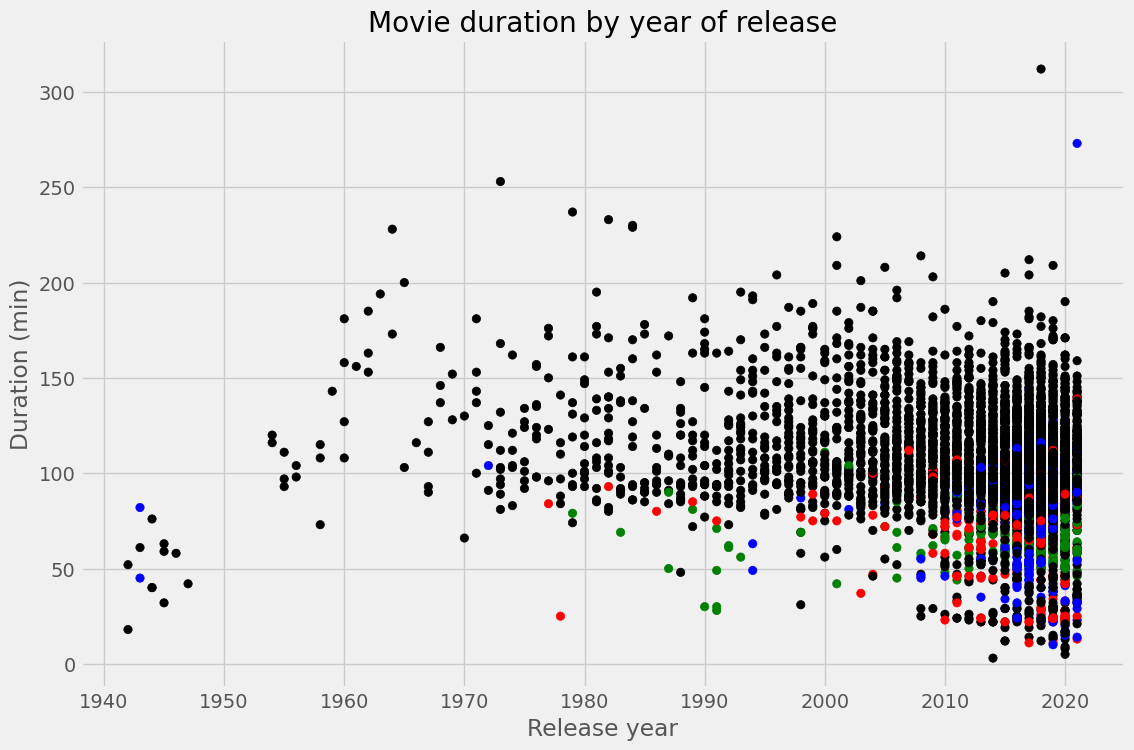

In [20]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], color = colors )

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel('Duration (min)')

# Show the plot
plt.show()

Working on it...